## In this notebook image compression using PCA is demonstrated.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import os

In [2]:
dirname = '/kaggle/input/olivetti'
fileName = 'olivetti_faces.npy'
faces = np.load(os.path.join(dirname,fileName))

In [3]:
faces.shape

(400, 64, 64)

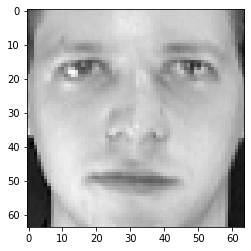

In [4]:
plt.imshow(faces[0], cmap='gray')

### Average face

avgFace.shape: (64, 64)


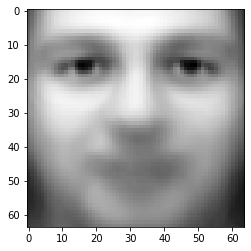

In [5]:
avgFace = np.average(faces, axis=0)
print('avgFace.shape:',avgFace.shape)
plt.imshow(avgFace, cmap='gray')

In [6]:
#Subtracting mean from all the samples
X = faces
X = X.reshape((X.shape[0], X.shape[1]**2))
X = X - np.average(X, axis=0)

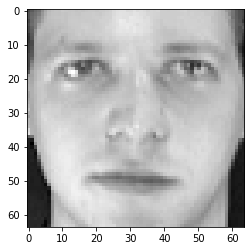

In [7]:
plt.imshow(avgFace + X[0].reshape(64,64), cmap='gray')

### Computing covariance matrix

In [8]:
XtX = np.matmul(X.T, X)
print('XtX.shape:', XtX.shape)

XtX.shape: (4096, 4096)


In [9]:
C = (1/X.shape[0])*XtX

Finding eigen vectors (which are also the orthonormal directions) of the covariance matrix.

In [10]:
w, v = LA.eig(C)

Expressing any samples as a linear combination of the eigen vectors:<br/>
$x_i = \alpha_1 v_1 + \alpha_2 v_2 + ................+\alpha_d v_d$
<br/>
To find $\alpha_1$:
<br/>
$v_1^T x_i = \alpha_1(v_1^T  v_1) + \alpha_2(v_1^T v_2)  +.........+ \alpha_d(v_1^T v_d)$
<br/>
$v_1^T x_i = \alpha_1.1 + \alpha_2.0 +............+\alpha_d.0$     $\;\;\;\;\;\;$  (Since $v_1$, $v_2$,....$v_d$ are orthonormal to each other.)
<br/>
$\implies \alpha_1 = v_1^T x_i$
<br/>
Similarly all other $\alpha$ can also be found out.
<br/>
<br/>
<br/>
* Instead of including all the eigen vectors, we can take only a small fraction of them and the reconstructed image will be a good match with the origianl image.
<br/>
* Suppose we take only 100 eigen vectors (out of 4096 in this case) corresponding to top 100 eigen values:

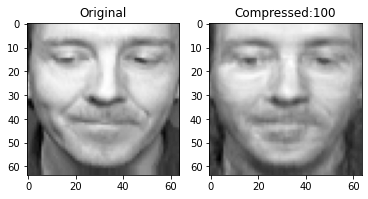

In [11]:
numComponents = 100
V = v[:,0:numComponents]
V.shape

person_id = 25
fig,a =  plt.subplots(1,2)
import numpy as np
x = np.arange(1,5)
a[0].imshow(avgFace + X[person_id].reshape(64,64), cmap='gray')
a[0].set_title('Original')

alphas = np.dot(V.T, X[person_id])
a[1].imshow(avgFace + np.dot(V, alphas).reshape(64,64), cmap='gray')
a[1].set_title('Compressed:' + str(numComponents))
plt.show()

* We can see that the reconstructed image is very similar to the original image.

## PCA allows us to compress the data by only storing the 'important' information 

* Suppose we had 1 million gray scale images each of size 64X64. We would have to store $(10^6)(64)(64) = 4.096 X10^9$ values.
* But if we do PCA and pick only the top r eigen vectors then:
<br>
we need to store only the r eigen vectors(of dim 4096) and r $\alpha$ for each of the one million images: $(4096*r + 10^6 * r)$
<br/>
If r = 100 then we need to store only about $~10^8$ values. That means, we will need 10 times lesser memory to store all the images.